# Домашнее задание к лекции «Кейс-стади»

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import re
np.random.seed(42)

## Задание 1. Тестирование гипотез

In [14]:
v = pd.read_csv('../data/video_games_sales_2.csv')
v.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [15]:
v.shape

(55792, 23)

In [16]:
# level of significance
alpha = 0.05

**Вопрос 1**. Как критики относятся к спортивным играм?

In [17]:
# null hypothesis --> Критики в среднем относятся к спортивным играм так же, как к не спортивным
# alt hypothesis --> Критики в среднем относятся НЕ так же
# two-sided two-sample test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B786327B20>]],
      dtype=object)

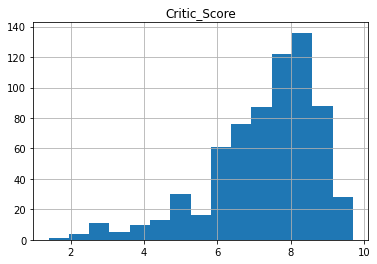

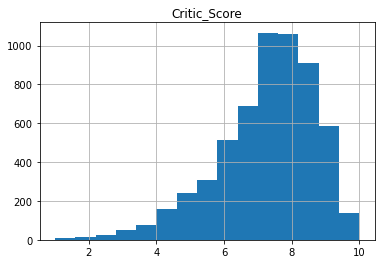

In [18]:
# splitting data into two samples + hist
v_sports = v[v['Genre'] == 'Sports']
v_sports = v_sports[['Critic_Score']]
v_sports.hist(bins = 15)

v_nsports = v[v['Genre'] != 'Sports']
v_nsports = v_nsports[['Critic_Score']]
v_nsports.hist(bins = 15)

In [19]:
print(v_sports['Critic_Score'].mean(), v_nsports['Critic_Score'].mean())

7.291424418604655 7.2045656634747255


In [20]:
# из-за невозможности достичь нормальности распределения используем U-тест Манна-Уитни 
# (Олег считает, что для теста Стьюдента assumptions выполняются)
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(v_sports, v_nsports) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=95736019.500, p=0.000


Исходя из результатов, критики в среднем существенно лучше относятся к спортивным играм (p-value < alpha). При этом важно отметить, что так как разница между распределениями очень мала, а объем выборки очень велик, данное существенное статистическое отличие может быть связано с особенностью расчета и на самом деле быть вызвано случайностью.

**Вопрос 2**. Критикам нравятся больше игры на PC или на PS4?

In [21]:
# null hypothesis --> Критики любят PC больше или также как PS4, PC <= PS4
# alt hypothesis --> Критики меньше любят PC, PC > PS4
# right-tailed two-sample test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B78640EF40>]],
      dtype=object)

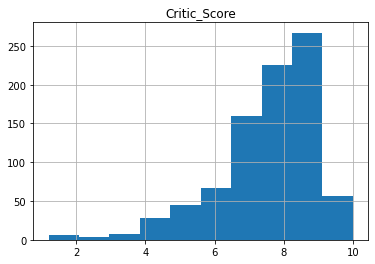

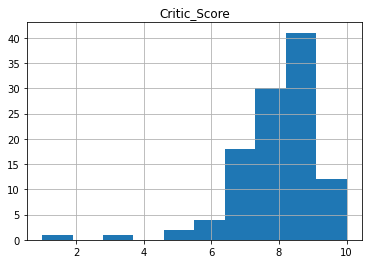

In [22]:
# splitting data into two samples + hist
PC = v[v['Platform'] == 'PC']
PC = PC[['Critic_Score']].dropna()
PC.hist(bins = 10)

PS4 = v[v['Platform'] == 'PS4']
PS4 = PS4[['Critic_Score']].dropna()
PS4.hist(bins = 10)

In [23]:
print(PC['Critic_Score'].mean(), PS4['Critic_Score'].mean())

7.541849710982658 7.904587155963299


In [24]:
# для целей упражнения предположим, что t-test assumptions выполнены
result = stats.ttest_ind(PC['Critic_Score'], PS4['Critic_Score'], equal_var=False)
print(result)
if (result.statistic > 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу о том, что критики любят PC больше или также как PS4')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.006931808250254211)
Не отвергаем нулевую гипотезу


In [25]:
# Если поменять альтернитивную гипотезу на PC < PS4, то результат будет иным.

Можно сделать тот же комментарий, что и для вопроса 1. Небольшая разница и огромный объем могут сказаться на результате.

**Вопрос 3**. Критикам больше нравятся стрелялки или стратегии?

In [26]:
# null hypothesis --> Стрелялки >= стратегии
# alt hypothesis --> Стрелялки < стратегии
# left-tailed two sample test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B786505A00>]],
      dtype=object)

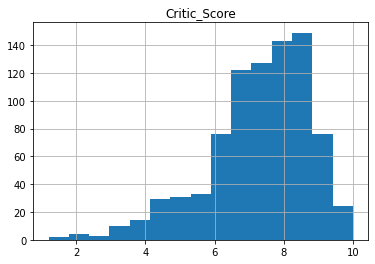

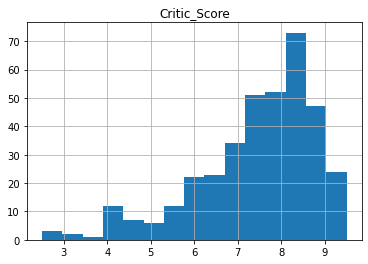

In [27]:
# splitting data into two samples + hist
shooter = v[v['Genre'] == 'Shooter']
shooter = shooter[['Critic_Score']].dropna()
shooter.hist(bins = 15)

strat = v[v['Genre'] == 'Strategy']
strat = strat[['Critic_Score']].dropna()
strat.hist(bins = 15)

In [28]:
print(shooter['Critic_Score'].mean(), strat['Critic_Score'].mean())

7.2868327402135264 7.429268292682925


In [29]:
# для целей упражнения предположим, что t-test assumptions выполнены
result = stats.ttest_ind(shooter['Critic_Score'], strat['Critic_Score'], equal_var=False)
print(result)
if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу о том, что критики любят стрелки больше или также как стратегии')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414223071)
Не отвергаем нулевую гипотезу


In [30]:
# сравним с тестом Манна-Уитни
stat, p = mannwhitneyu(shooter['Critic_Score'], strat['Critic_Score'], alternative='less') 
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=146660.500, p=0.057


Результаты обоих тестов не позволяют отвергнуть нулевую гипотезу.

## Задание 2. Спам-фильтр

In [31]:
sp = pd.read_csv('../data/spam.csv')
sp.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
sp.shape

(5572, 2)

In [37]:
# executive this to download NTLK
# import nltk
# nltk.download()

In [40]:
# execute this to check that NTLK is installed
# from nltk.corpus import brown
# brown.words()

In [41]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [42]:
def word_transform(row):
    row = row.lower() # lower-case
    row = re.sub('[\W_]+',' ', row) # removing symbols
    row = word_tokenize(row) # tokenize
    row = [w for w in row if not w in stopwords_set] # stop_words
    row = [wordnet_lemmatizer.lemmatize(w) for w in row] # lemmatize
    row = ' '.join(map(str, row)) # back to string
    return row

sp['Message'] = sp['Message'].apply(word_transform)
sp.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sp.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=None)

In [44]:
tfidf_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,8034,8035,8036,8037,8038,8039,8040,8041,8042,8043
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
tfidf_matrix.shape

(5572, 8044)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, sp['Category'], test_size = 0.30, random_state = 42)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [48]:
len(y_test)

1672

In [49]:
len(lr.predict(X_test))

1672

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(X_test))

0.958732057416268

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(X_test))

array([[1445,    3],
       [  66,  158]], dtype=int64)

In [52]:
actual = pd.DataFrame(y_test)
actual.columns = ['Actual']

In [53]:
pred = pd.DataFrame(lr.predict(X_test))
pred.columns = ['Prediction']
pred.head()

,Prediction
0,ham
1,ham
2,ham
3,ham
4,ham


In [54]:
data = actual.join(sp, how='left')
data = data.drop(['Category'], axis=1).reset_index(drop = True)
data.head()

,Actual,Message
0,ham,squeeeeeze christmas hug u lik frndshp den hug...
1,ham,also sorta blown couple time recently id rathe...
2,ham,mmm thats better got roast b better drink 2 go...
3,ham,mm kanji dont eat anything heavy ok
4,ham,ring come guy costume gift future yowifes hint...


In [55]:
result = pd.concat([data, pred], axis=1)
result.columns = ['Actual', 'Message', 'Prediction']
columnsTitles = ['Actual', 'Prediction', 'Message']
result = result.reindex(columns=columnsTitles)
result = result[result.Actual != result.Prediction]
result.head()

,Actual,Prediction,Message
17,ham,spam,hey free call
40,spam,ham,reminder downloaded content already paid goto ...
47,spam,ham,guess somebody know secretly fancy wan na find...
74,spam,ham,oh god found number glad text back xafter msg ...
84,spam,ham,next amazing xxx picsfree1 video sent enjoy on...


In [56]:
# checking accuracy manually
1-len(result)/len(y_test)

0.958732057416268